<a href="https://colab.research.google.com/github/PKhanal95/Ghibli/blob/main/GHIBLI.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

Loading model...


/usr/local/lib/python3.11/dist-packages/huggingface_hub/utils/_auth.py:94: UserWarning: 
The secret `HF_TOKEN` does not exist in your Colab secrets.
To authenticate with the Hugging Face Hub, create a token in your settings tab (https://huggingface.co/settings/tokens), set it as secret in your Google Colab and restart your session.
You will be able to reuse this secret in all of your notebooks.
Please note that authentication is recommended but still optional to access public models or datasets.
  warnings.warn(


model_index.json:   0%|          | 0.00/546 [00:00<?, ?B/s]

Fetching 15 files:   0%|          | 0/15 [00:00<?, ?it/s]

config.json:   0%|          | 0.00/4.84k [00:00<?, ?B/s]

preprocessor_config.json:   0%|          | 0.00/342 [00:00<?, ?B/s]

config.json:   0%|          | 0.00/612 [00:00<?, ?B/s]

scheduler_config.json:   0%|          | 0.00/313 [00:00<?, ?B/s]

special_tokens_map.json:   0%|          | 0.00/472 [00:00<?, ?B/s]

model.safetensors:   0%|          | 0.00/1.22G [00:00<?, ?B/s]

model.safetensors:   0%|          | 0.00/492M [00:00<?, ?B/s]

merges.txt:   0%|          | 0.00/525k [00:00<?, ?B/s]

tokenizer_config.json:   0%|          | 0.00/806 [00:00<?, ?B/s]

config.json:   0%|          | 0.00/748 [00:00<?, ?B/s]

vocab.json:   0%|          | 0.00/1.06M [00:00<?, ?B/s]

diffusion_pytorch_model.safetensors:   0%|          | 0.00/3.44G [00:00<?, ?B/s]

config.json:   0%|          | 0.00/581 [00:00<?, ?B/s]

diffusion_pytorch_model.safetensors:   0%|          | 0.00/335M [00:00<?, ?B/s]

Loading pipeline components...:   0%|          | 0/7 [00:00<?, ?it/s]

Model loaded!
Please upload your image file:


Saving MINE.jpg to MINE.jpg


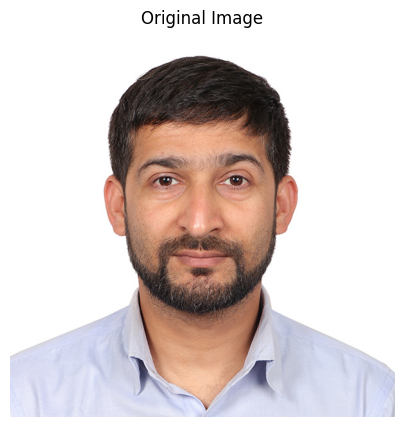

Enter stylization strength (0.3-0.8, recommended 0.6): 5
Generating image...


  0%|          | 0/40 [00:00<?, ?it/s]

Image generated in 1886.22 seconds!


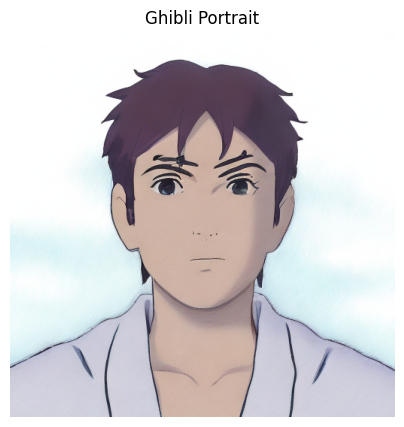

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

Image saved as ghibli_portrait_MINE.jpg and download initiated!


In [1]:
from diffusers import StableDiffusionImg2ImgPipeline
import torch
from PIL import Image
import io
from google.colab import files
import matplotlib.pyplot as plt
import time

# Load model function
def load_model():
    model_id = "nitrosocke/Ghibli-Diffusion"  # Correct model ID
    dtype = torch.float16 if torch.cuda.is_available() else torch.float32
    print("Loading model...")
    pipe = StableDiffusionImg2ImgPipeline.from_pretrained(model_id, torch_dtype=dtype)
    pipe.to("cuda" if torch.cuda.is_available() else "cpu")
    pipe.enable_attention_slicing()  # Optimize memory usage
    print("Model loaded!")
    return pipe

# Function to generate Ghibli-style image
def generate_ghibli_image(image, pipe, strength):
    image = image.convert("RGB")
    image = image.resize((512, 512))  # Ensure proper size

    prompt = "Ghibli-style anime painting, soft pastel colors, highly detailed, masterpiece"

    print("Generating image...")
    start_time = time.time()
    result = pipe(prompt=prompt, image=image, strength=strength).images[0]
    print(f"Image generated in {time.time() - start_time:.2f} seconds!")
    return result

# Check for GPU
gpu_info = "GPU is available!" if torch.cuda.is_available() else "Warning: GPU not available. Processing will be slow."
print(gpu_info)

# Load the model
pipe = load_model()

# Upload image section
print("Please upload your image file:")
uploaded = files.upload()

if uploaded:
    file_name = list(uploaded.keys())[0]
    image = Image.open(io.BytesIO(uploaded[file_name]))

    # Display original image
    plt.figure(figsize=(5, 5))
    plt.imshow(image)
    plt.title("Original Image")
    plt.axis('off')
    plt.show()

    # Ask for strength input with error handling
    while True:
        try:
            strength = float(input("Enter stylization strength (0.3-0.8, recommended 0.6): "))
            strength = max(0.3, min(0.8, strength))  # Clamp between 0.3 and 0.8
            break
        except ValueError:
            print("Invalid input. Please enter a number between 0.3 and 0.8.")

    # Generate and display the result
    result_img = generate_ghibli_image(image, pipe, strength)

    plt.figure(figsize=(5, 5))
    plt.imshow(result_img)
    plt.title("Ghibli Portrait")
    plt.axis('off')
    plt.show()

    # Save the output image and offer download
    output_filename = f"ghibli_portrait_{file_name}"
    result_img.save(output_filename)
    files.download(output_filename)
    print(f"Image saved as {output_filename} and download initiated!")
else:
    print("No file was uploaded. Please run the cell again and upload an image.")